In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

In [9]:
data = pd.read_csv("./Live_20210128.csv")
data = data.iloc[:,:-4]

In [10]:
data.head(2)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0


In [11]:
x = data.iloc[:, 3:]

In [12]:
x.head(2)

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0


In [13]:
x = np.array(x)

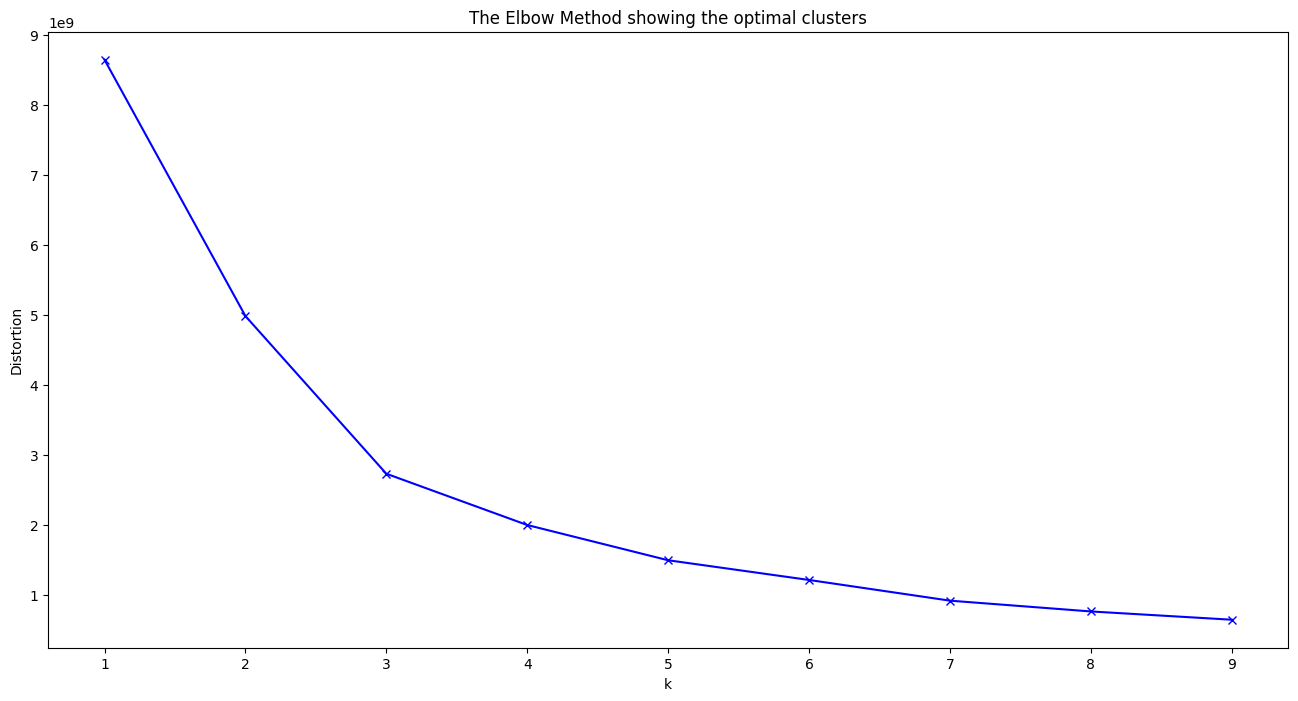

In [14]:
# Collecting the distortions into list
distortions = []
K = range(1, 10)
for k in K:
 kmeanModel = KMeans(n_clusters=k, n_init='auto')
 kmeanModel.fit(x)
 distortions.append(kmeanModel.inertia_)
# Plotting the distortions
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal clusters')
plt.show()

In [15]:
# Define the model
kmeans_model = KMeans(n_clusters=4, n_init='auto', random_state=32932)
# Fit into our dataset fit
kmeans_predict = kmeans_model.fit_predict(x)

In [16]:
data['cluster'] = kmeans_predict

In [17]:
data.head(2)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,0


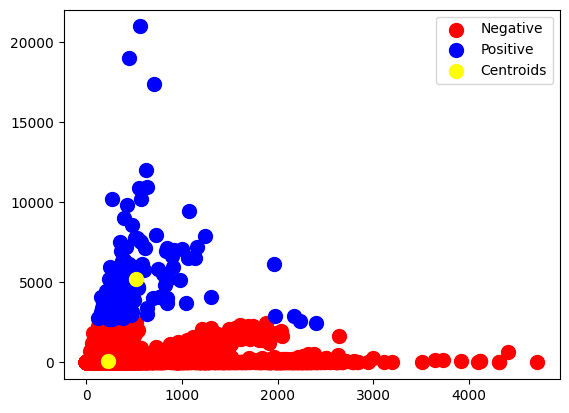

In [20]:
# Visualising the clusters
plt.scatter(x[kmeans_predict == 0, 0], x[kmeans_predict == 0, 1], s = 100, c = 'red', label = 'Negative')
plt.scatter(x[kmeans_predict == 1, 0], x[kmeans_predict == 1, 1], s = 100, c = 'blue', label = 'Positive')
# Plotting the centroids of the clusters
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()